In [1]:
 """
Use to be able to retrieve modules and import in core and app directorie
"""
from os import sys, path
sys.path.append(path.dirname(path.dirname(path.abspath("__file__"))))
print(sys.path)

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src']


In [2]:
import datetime
import glob
from os import path
import warnings

import numpy as np

import pyat.core.Utils.MatrixInspector as scope
import pyat.core.Utils.TiffDriver as tiff
import stage.DirectorySettings as directories
from stage.Export_Geotiff import Export_File
from stage.GeoTiffNormalComputer import GeoTiffNormalComputer
from stage.IncidenceAngleComputer import IncidenceAngleComputer
from stage.NCFileCache import XSFFile

warnings.filterwarnings('ignore')

['C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\python36.zip', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\DLLs', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev', '', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\win32\\lib', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\Pythonwin', 'C:\\Users\\krodrigu\\AppData\\Local\\Continuum\\anaconda3\\envs\\pyATDev\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\krodrigu\\.ipython', 'C:\\Users\\krodrigu\\Desktop\\Stage_Kevin\\Projet\\pyat\\src', 'C:\\Users\\krodrigu\\Desktop\\Stage_K

In [3]:
file_names = glob.glob(directories.input_directory + "/backscatter/boite1/*.xsf")
now = datetime.datetime.now()
# Récupère les données du XSF
files = []
for file_name in file_names:
    if "0047_20180914_222017_ShipName" not in file_name:
        files.append(XSFFile(file_name))

single_file = [
    value
    for value in files
    if value.file_name.find("0032_20180914_183119_ShipName") > 0]

single_file = single_file[0]

filename_incidence_angle = path.join(
    directories.output_dir,
    "incidence_angle_" + now.strftime("%Y_%m_%d_%H_%M_%S") + ".tif",)

In [4]:
mnt_filename = "C:/Users/krodrigu/Documents/pyat/2019_10_30_13_12_32.tif"
normal = GeoTiffNormalComputer(mnt_filename)
normal.compute_normal()

compute normal to the geotiff surface


In [5]:
incidence_computer = IncidenceAngleComputer(files, directories.output_dir)
x, y, cache, incidence_angles = incidence_computer.compute_incidence_angle(normal, single_file)

Computing bounding box
define metric projection
Use projection : +proj=utm +zone=30+ellps=WGS84 +datum=WGS84 +units=m +no_defs
Computed UTM detection projection for file  W:/traitement_Campagnes/Stage_Kevin/backscatter/boite1\0032_20180914_183119_ShipName.xsf
Computed UTM detection projection for file  W:/traitement_Campagnes/Stage_Kevin/backscatter/boite1\0032_20180914_183119_ShipName.xsf
end computing incidence angle for file W:/traitement_Campagnes/Stage_Kevin/backscatter/boite1\0032_20180914_183119_ShipName.xsf


In [6]:
np.nanmax(incidence_angles)

178.9410908019105

In [7]:
max_Angle = np.where(incidence_angles == np.nanmax(incidence_angles))
incidence_angles[max_Angle[0], max_Angle[1]] = np.nan

In [8]:
export_to_geotiff = Export_File()
export_to_geotiff.xsf_toTIFF(filename_incidence_angle, x, y, incidence_angles, cache)

writing file C:/Users/krodrigu/Documents/pyat/incidence_angle_2019_11_26_10_54_58.tif


Mean :  -0.2526475
Max :  103.17929
Min :  -97.531784
Median :  -1.043023
Std :  46.861465
                                      Incidence angle computed                                      


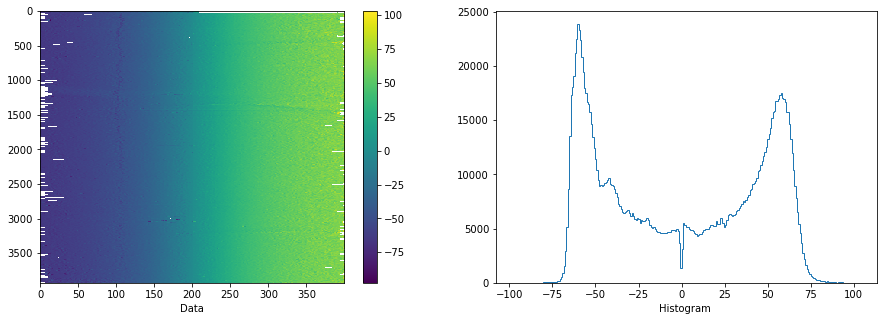

In [9]:
scope.display_geotiff_data(filename_incidence_angle, "Incidence angle computed", True)